**Data Analysis**
---
Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. It is done after data exploration and cleaning. When we do data analysis we answer questions corresponding to our dataset.

In [46]:
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

After we cleaned the data it is important to be able to answer some questions related to the data. In this part we will use graphs and group_by function in order to successfully answer them. The questions we need to answer is the following:


1.   What was the best month for sales? How much was earned that month?
2.   Which city had the highest number of sales?
3.   What time should we display advertisements to maximize likelihood of customer's buying product?
4.   What products are most often sold together?
5.   What product sold the most? Why do you think it sold the most?


We'll start by reading in the already cleaned data:

In [47]:
data = pd.read_csv('./datasets/processed/sales.csv') # Read the data

Now that we have our cleaned data we can start answering our questions. We will mostly use Pandas groupby() function, which is used for grouping the data according to the categories and applying a function to the categories. It also helps to aggregate data efficiently. The Pandas groupby() is a very powerful function with a lot of variations. It makes the task of splitting the Dataframe over some criteria really easy and efficient.

# **1.   What was the best month for sales? How much was earned that month?**

In order to answer this question we need to get all unique months and all sales for each unique month:

In [48]:
unique_Months = data['Month'].apply(lambda x: calendar.month_abbr[x]).unique() # Take all 12 months' names
Sales_by_month = data.groupby('Month').sum()['Sales'] # Take the highest number of sales for each month

Let's see which month had the highest number of sales with a bar graph:

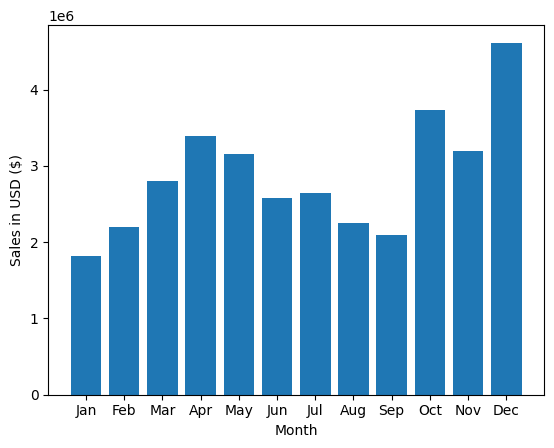

In [49]:
# Plot the highest number of sales for each month
plt.bar(unique_Months, Sales_by_month)
plt.xticks(unique_Months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

We see that in December we had the most sales, which is reasonable because of Christmas and massive number of presents exchanged.

# **2.   Which city had the highest number of sales?**

In order to answer this question we need to get all unique cities and the number of sales of each city:

In [50]:
Sales_by_city = data.groupby('City').sum()['Sales'] # Take the number of sales for each city
unique_Cities = data.groupby('City').sum().index # Take all cities

Let's see which city had the highest number of sales with a bar graph:

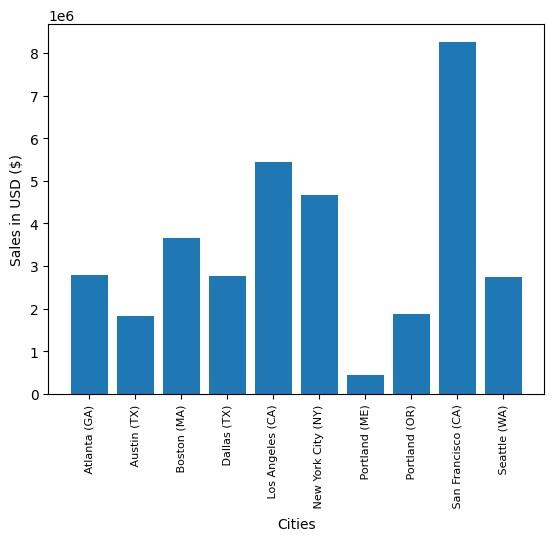

In [51]:
# Plot the highest number of sales for each city
plt.bar(unique_Cities, Sales_by_city)
plt.xticks(unique_Cities, rotation = 90, size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

We see that San Francisco (CA) had the most sales.

# **3.   What time should we display advertisements to maximize likelihood of customer's buying product?**

In order to answer this question we need to get all hours of the day and the number of sales per hour:

In [52]:
Sales_per_hour = data.groupby(['Hour']).count() # Take sales per hour
Hours = [hours for hours, df in data.groupby('Hour')] # Take all hours

Let's see in which hour we had the highest number of sales with a plot graph:

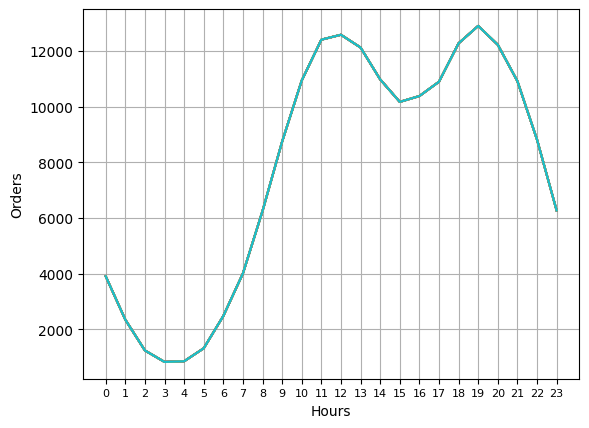

In [53]:
# Plot the orders conducted hourly
plt.plot(Hours, data.groupby(['Hour']).count())
plt.xticks(Hours, size = 8)
plt.grid()
plt.ylabel('Orders')
plt.xlabel('Hours')
plt.show()

As we see, the hours with the highest likelihood of customer's buying product are 11am (11:00) and 7pm (19:00).

# **4.   What products are most often sold together?**

In order to answer this question we need to see all the duplicates Order IDs there are in the dataset. Duplicates Order IDs means that two different products sold together.

In [54]:
duplicated_OrderID = data[data['Order ID'].duplicated(keep = False)]
duplicated_OrderID.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6
57,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25
58,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25
133,141365,Wired Headphones,1.0,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City (NY),11,19
134,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11,19


We should create a new column that will group all same Order IDs, using groupby function:

In [55]:
duplicated_OrderID['Grouped Products'] = duplicated_OrderID.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicated_OrderID.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped Products
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6,"USB-C Charging Cable, Wired Headphones"
57,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25,"AA Batteries (4-pack), Apple Airpods Headphones"
58,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25,"AA Batteries (4-pack), Apple Airpods Headphones"
133,141365,Wired Headphones,1.0,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City (NY),11,19,"Wired Headphones, Vareebadd Phone"
134,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11,19,"Wired Headphones, Vareebadd Phone"


Next we should drop duplicates, as now we have Grouped Products column:

In [56]:
Grouped_Products = duplicated_OrderID[['Order ID', 'Grouped Products']].drop_duplicates()
Grouped_Products.head(6)

,Order ID,Grouped Products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"AA Batteries (4-pack), Apple Airpods Headphones"
133,141365,"Wired Headphones, Vareebadd Phone"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Bose SoundSport Headphones, Google Phone"
228,141457,"Apple Airpods Headphones, iPhone"


Finally, count the combinations of 2 products sold together:

In [57]:
count = Counter()

for row in Grouped_Products['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # Take the 2 most common products sold together

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 704),
 (('Google Phone', ' USB-C Charging Cable'), 685),
 (('iPhone', ' Wired Headphones'), 315),
 (('Google Phone', ' Wired Headphones'), 287),
 (('Lightning Charging Cable', ' iPhone'), 283),
 (('USB-C Charging Cable', ' Google Phone'), 282),
 (('iPhone', ' Apple Airpods Headphones'), 258),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 256),
 (('Google Phone', ' Bose SoundSport Headphones'), 148),
 (('Wired Headphones', ' iPhone'), 138)]

iPhone and Lightning Charging Cable is most often sold together.

# **5.   What product sold the most? Why do you think it sold the most?**

In order to answer this question We just need to sum up the Quantity Ordered based on Grouped Products:

In [58]:
unique_Products = data.groupby('Product').sum().index
Quantity_Ordered_by_product = data.groupby('Product').sum()['Quantity Ordered']

Let's see the product with the most quantity order with a bar graph:

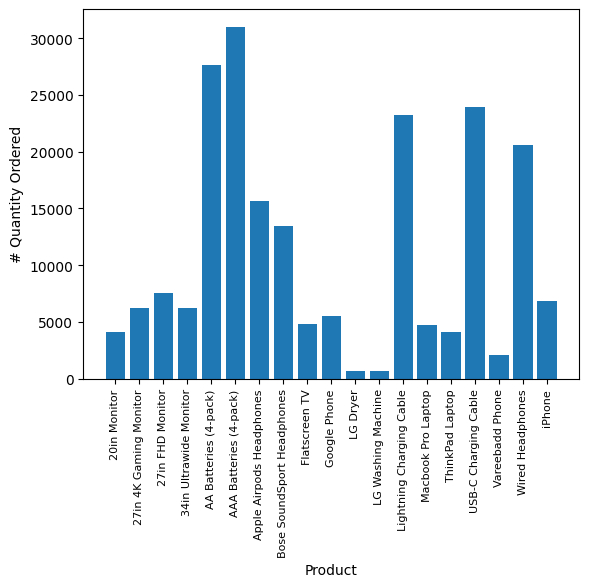

In [59]:
# Plot the quantity ordered for each product
plt.bar(unique_Products, Quantity_Ordered_by_product)
plt.xticks(unique_Products, rotation = 90, size = 8)
plt.ylabel('# Quantity Ordered')
plt.xlabel('Product')
plt.show()

The AAA Batteries (4-pack), along with AA Batteries (4-pack), had the most quantity sales of all products. One reasonable explanation would be that batteries are cheap and LG Dryer is not. Let's test this theory:

In [60]:
Prices_of_products = data.groupby('Product').mean()['Price Each']
Prices_of_products

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Let's combine Quantity Ordered and Prices, along with the coresponding Products in one graph:

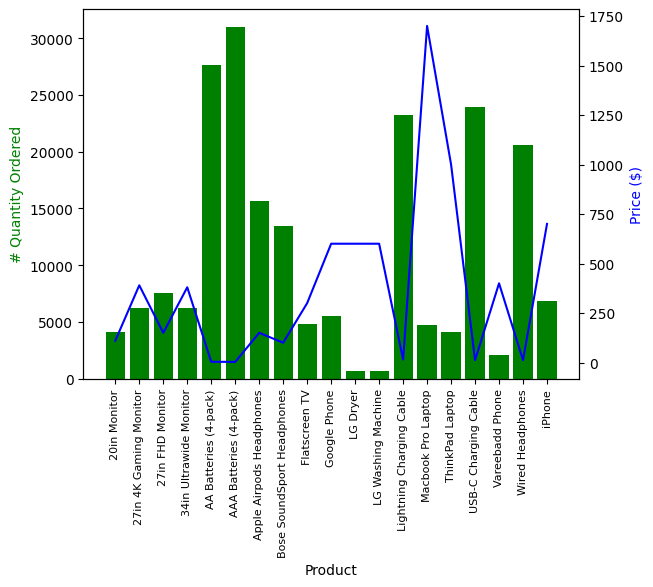

In [61]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(unique_Products, Quantity_Ordered_by_product, color = 'g')
ax2.plot(unique_Products, Prices_of_products, color = 'b')

ax1.set_xlabel('Product')
ax1.set_ylabel('# Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(unique_Products, rotation = 90, size = 8)
plt.show()

We see that Macbook is much more expensive than a Dryer, but it's quantity ordered is so much higher. This happens probably because students buy Macbooks more frequntly than someone who would by a Dryer or a Washing Machine.